# Rudimentary Image Processing
## Images as a function
$$\textrm{Images are simply a function where }I = f(x,y) \textrm{ where I is the intensity, assuming black & white images}$$
* Hence images can be added, multiplied by a scalar, etc.... Can be used for blending images
* Images can be subtracted to find the difference between them
  * Have to be careful while subtracting images as it's uint8_t... So they get floored to 0. Best to convert to float32 before any operation

## Noise in Images
$$\vec{I'}(x,y) = \vec{I}(x,y) + \vec{\eta}(x,y)$$
Noise is just another function that's combined with the image to create the noisy image
* Salt & Pepper noise: Random occurances of black and white pixels
* Impulse noise: Random occurance of white pixels
* Gaussian noise: Variation in intensity drawn from a Guassian normal distribution
  * It's important to ensure that the std. dev of the noise is within reasonable range of the image range...

# Filtering
1. Weighted moving average: Correlation / Convolutions...
    $$\textrm{Uniform Weighted moving average: }G[i,j] = \frac{1}{(2k+1)^2}\sum_{u=-k}^k\sum_{v=-k}^kF[i+u,j+v]$$
    $$\textrm{Non Uniform Weighted moving average: }G[i,j] = \sum_{u=-k}^k\sum_{v=-k}^kH[u,v]F[i+u,j+v]$$
    Here H[u,v] is called either the kernel, mask or the cross correlation filter
    _So what makes a good kernel??? A very succesful major... Geddit?? :P_

2. Gaussian Filter
This allows us to have a guassian distributed filter coefficients to achieve much better smoothening
$$\frac{1}{16}\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1 \end{bmatrix}$$
where the guassian equation is
$$H(u,v)=\frac{1}{2\pi\sigma^2}e^{-\frac{u^2+v^2}{\sigma^2}}$$
This kinda filtering only makes sense if the noise is independantly distributed and it's mean is centered around 0... For example, guassian filters won't work with salt & pepper noise

3. Median Filter
  * Instead of taking the average, take the median of the values across it's neighbours. 
  * This isn't a linear operation
  * Median also preserves edges

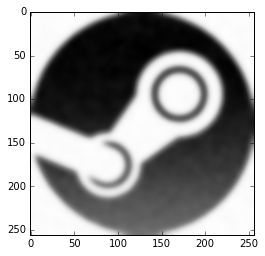

In [85]:
# Guassian filtering in action
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline 

KERNEL_SIZE = 10
SIGMA = 5

# Get the image
img = cv2.imread("2.png", 0)

# Add noise to an image
np_img = np.array(img)
noisy_img = np_img + np.random.normal(scale = 20.0, size=np_img.shape)
#plt.imshow(noisy_img, cmap='Greys_r')

# Remove the noise with a guassian filter
fixedimg = cv2.GaussianBlur(noisy_img,(21,21),0)
plt.imshow(np.array(fixedimg), cmap='Greys_r')

# Linearity
An opearator H is linear if (f1 and f2 are two functions and c is a constant)
* H(f1 + f2) = H(f1) + H(f2)
* H(c x f1) = c x H(f1)

## Impulse Function
Holy shit... Really holy shit
A single of area 1.0. In a continous world, with lim width tending to 0, it's height is infinity
* In 2-D, an impulse is a single pixel with a value 1

### Impulse Reponse
The response of a blackbox (represented by h(x)) to that impulse t.
* If h(x) is linear, then by looking at h(t), we can describe the entire function h(x), because, every input can be visualized as series of impulses shifted in time, and hence we can add the outputs of each of the impulses to get the output.
* Suppose we send an impulse into a correlation kernel H(u,v), what we'll get is -H(u,v) because of the way the kernel moves over and generates the response. To settle this, convolution and correlation has a different definition.
* Convolving an image with an impulse... well gives the image itself right...

## Correlation vs Convolution
$$\textrm{Cross Correlation: }G[i,j] = \sum_{u=-k}^k\sum_{v=-k}^kH[u,v]F[i+u,j+v]$$
$$\textrm{Convolution: }G[i,j] = \sum_{u=-k}^k\sum_{v=-k}^kH[u,v]F[i-u,j-v]$$
* So if an impulse is sent into a Convolution Kernel, the output is going to remain the same as the kernel itself.
* One thing to note is for a guassian filter (which is symmetric), both convolution and correlation gives the same output.

### Properties of Convolution
* Shift Invariant: Operator behaves the same way irrespective of the pixel's location within the image. 
* Linear opeators
* Commutative: f * g = g * f
* Associative: f * (g * h) = (f * g) * h
* Identity exists: Impulse
* Differention is linear: $$\frac{\partial}{\partial x}(f * g) = \frac{\partial f}{\partial x} * g$$

### Computational Complexity
N x N is the image size and W x W is the size of the kernel
So the number of multiplications is N<sup>2</sup> x W<sup>2</sup>
To get out of this...
$$ \textrm{Let }C=[1,2,1] \textrm{ and }R=\begin{bmatrix}
    1 \\
    2 \\
    1
\end{bmatrix} \textrm{ then H = C * R, i.e. }H = C * R = \begin{bmatrix}
    1 && 2 && 1 \\
    2 && 4 && 2 \\
    1 && 2 && 1
\end{bmatrix}$$
We can use the associative property of convolution to 
$$ img * H = (img * C) * R$$
which brings the complexity down to 2WN<sup>2</sup>

### Padding
* Full - Slightly bigger than the original size
* Same - Retains the original size, we get to specify is the border should be a replicate, or reflect as well.
* Valid - Slightly smaller than the original size